# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.339993e+01     1.457775e+01
 * time: 0.0028350353240966797
     1     6.212857e+01     1.136958e+01
 * time: 0.008423089981079102
     2     5.582811e+01     1.618795e+01
 * time: 0.021259069442749023
     3     4.064826e+01     1.163907e+01
 * time: 0.10670614242553711
     4     3.122695e+01     9.356909e+00
 * time: 0.12449407577514648
     5     2.945822e+01     9.357859e+00
 * time: 0.13973498344421387
     6     1.456029e+01     3.907318e+00
 * time: 0.15549302101135254
     7     1.074921e+01     1.526183e+00
 * time: 0.16885614395141602
     8     9.580641e+00     2.465710e+00
 * time: 0.18204307556152344
     9     9.148382e+00     1.477443e+00
 * time: 0.1957709789276123
    10     8.858589e+00     3.753690e+00
 * time: 0.2425830364227295
    11     8.366086e+00     2.147373e+00
 * time: 0.2533299922943115
    12     7.815573e+00     2.380845e+00
 * time: 0.2636570930480957
    13     7.321294e+00     1.954498e+00
 * time:

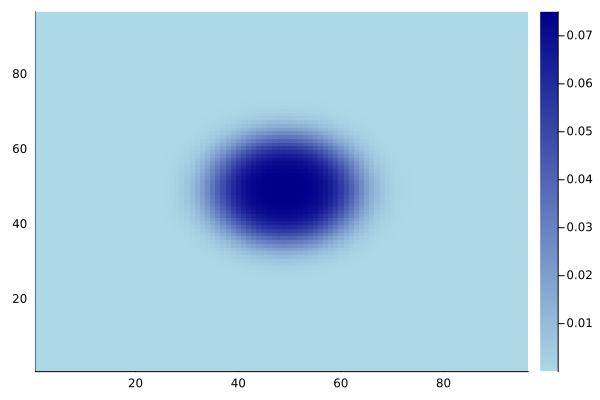

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))